In [1]:
import pandas as pd

In [2]:
transaction = pd.read_csv('/workspaces/TC-GNN-Explainer/Dataset/Credit_Card_Fraud/fraudTrain.csv')
transaction

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [3]:
trans_trim_data = transaction[['trans_date_trans_time','cc_num','is_fraud']]
trans_trim_data

,trans_date_trans_time,cc_num,is_fraud
0,2019-01-01 00:00:18,2703186189652095,0
1,2019-01-01 00:00:44,630423337322,0
2,2019-01-01 00:00:51,38859492057661,0
3,2019-01-01 00:01:16,3534093764340240,0
4,2019-01-01 00:03:06,375534208663984,0
...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,0
1296671,2020-06-21 12:12:19,6011149206456997,0
1296672,2020-06-21 12:12:32,3514865930894695,0
1296673,2020-06-21 12:13:36,2720012583106919,0


In [4]:
grouped = trans_trim_data.groupby('cc_num', as_index = False).sum()
grouped

,cc_num,is_fraud
0,60416207185,9
1,60422928733,12
2,60423098130,10
3,60427851591,14
4,60487002085,0
...,...,...
978,4958589671582726883,0
979,4973530368125489546,10
980,4980323467523543940,10
981,4989847570577635369,0


In [5]:
fraud = grouped[grouped['is_fraud']>0]['cc_num']
notfraud = grouped[grouped['is_fraud']==0]['cc_num']

In [6]:
fraud

0              60416207185
1              60422928733
2              60423098130
3              60427851591
5              60490596305
              ...         
976    4911818930706644725
977    4956828990005111019
979    4973530368125489546
980    4980323467523543940
982    4992346398065154184
Name: cc_num, Length: 762, dtype: int64

In [7]:
notfraud

4              60487002085
6              60495593109
12            501882822387
26            570273151375
30            571844099986
              ...         
966    4797297220948468262
969    4810839835482794272
972    4861310130652566408
978    4958589671582726883
981    4989847570577635369
Name: cc_num, Length: 221, dtype: int64

In [8]:
# Transaction chain of fraud users
fraud_trans = trans_trim_data.merge(fraud, on='cc_num', how='inner').sort_values(by=['cc_num','trans_date_trans_time'], ascending=True)
fraud_trans

,trans_date_trans_time,cc_num,is_fraud
669609,2019-01-01 12:47:15,60416207185,0
669610,2019-01-02 08:44:57,60416207185,0
669611,2019-01-02 08:47:36,60416207185,0
669612,2019-01-02 12:38:14,60416207185,0
669613,2019-01-02 13:10:46,60416207185,0
...,...,...,...
219735,2020-06-20 21:04:59,4992346398065154184,0
219736,2020-06-21 00:41:01,4992346398065154184,0
219737,2020-06-21 02:47:59,4992346398065154184,0
219738,2020-06-21 08:04:28,4992346398065154184,0


In [9]:
no_fraud_trans = trans_trim_data.merge(notfraud, on='cc_num', how='inner').sort_values(by=['cc_num','trans_date_trans_time'], ascending=True)
no_fraud_trans

,trans_date_trans_time,cc_num,is_fraud
317363,2019-01-06 03:23:55,60487002085,0
317364,2019-01-08 02:11:33,60487002085,0
317365,2019-01-08 21:03:58,60487002085,0
317366,2019-01-08 23:13:33,60487002085,0
317367,2019-01-11 06:12:49,60487002085,0
...,...,...,...
300975,2020-06-20 05:25:05,4989847570577635369,0
300976,2020-06-20 12:54:21,4989847570577635369,0
300977,2020-06-20 17:53:32,4989847570577635369,0
300978,2020-06-20 18:40:19,4989847570577635369,0


In [10]:
import matplotlib.pyplot as plt

def save_fraud_timeseries():
    for i in fraud:
        fraud_trans[fraud_trans['cc_num']==i].plot('trans_date_trans_time','is_fraud', figsize=(20,2))
        plt.savefig('/workspaces/TC-GNN-Explainer/ExploratoryDataAnalysis/Fraud_TS/TS_'+str(i)+'.png')

#save_fraud_timeseries() #uncomment if you want to save the figures

In [11]:
only_fraud_trans = transaction[transaction['is_fraud']==1]
only_fraud_trans

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295399,1295399,2020-06-21 01:00:08,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,a83b093f0c1d9068fa0089f7c722615f,1371776408,26.888686,-80.834389,1
1295491,1295491,2020-06-21 01:53:35,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,f75b35bed13b9e692f170dba45a15b21,1371779615,28.216707,-79.855648,1
1295532,1295532,2020-06-21 02:16:56,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,a0ba2472cd3fc9731f2a18d3f308f5c3,1371781016,29.700456,-91.361632,1
1295666,1295666,2020-06-21 03:26:20,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,daa281350b1e16093c7b4bf97bf4d6ed,1371785180,32.675272,-103.484949,1


In [12]:
only_not_fraud_trans = transaction[transaction['is_fraud']==0]
only_not_fraud_trans

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [13]:
#Convert to graphs

from os.path import join
from pandas import read_csv 
import pandas as pd
import torch 
from torch_geometric.data import HeteroData 
import torch_geometric.transforms as T
from datetime import date, datetime, timedelta
from torch.utils.data import Dataset
import os.path as osp
import os
import warnings
warnings.filterwarnings('ignore')

class DatasetPrep(Dataset):
    """
    This function reads in the MOOC/Credit_Card (CC) tsv's, truncates and outputs a HeteroData PyG graph dataset.
    Call this function by  `dataset = DatasetPrep(dataset_name, root, type, num_slice, days or percentage)`
    
    Parameters:
    * dataset_name (str): "MOOC" or "CC"
                    MOOC dataset contains ~30 days of user actions.
                    CC Dataset contains ~two years of transactions.
    * root (str): string with filepath where the mooc dataset is stored in your computer
    * type (str):   G - simply the graph
                    CG - Conjugate_graph approach: edge_ts information is in ts for the nodes. 
    * num_slice (int): number of slices to split the graph, The function splits the time range evenly. 
                    The full graph is stored in dataset[len(dataset)-1]
    * days (int) = None: The first number of days starting from the minimum time to keep in dataset
    * percentage (float) = None: The percentage of rows to keep in dataset starting from first row. (0. to 1.)
    * truncate_size (int) : The number of rows to keep in dataset starting from the first row
    Returns: Dataset
    Each graph can be accessed by `dataset[0]`
    """
    def __init__(self, dataset_name:str, root, type,num_slice = None, days = None, percentage = None, truncate_size = None):

        assert (days is None) or (percentage is None), "Please provide either days or percentage, but not both."
        if days is None and percentage is None:
            percentage = 1

        # read datafram and truncate
        if dataset_name == "MOOC":
            data = self.MOOC_HeteroGraph(root=root, days=days, percentage=percentage, truncate_size = truncate_size)

        elif dataset_name == "CC":
            data = self.Credit_Card_HeteroGraph(root=root, days=days, percentage=percentage, truncate_size = truncate_size, fraud=False)
        elif dataset_name == "DRED":
            data = self.DRED_HeteroGraph(root=root, days=days, percentage=percentage, truncate_size = truncate_size)
        elif dataset_name == "fraud":
            data = self.Credit_Card_HeteroGraph(root=root, days=days, percentage=percentage, truncate_size = truncate_size, fraud=True)
        else:
            raise Exception("Dataset_name is invalid, only MOOC, CC, and DRED are supported.")

        node_list = data.metadata()[0]
        source = node_list[0] 
        sink = node_list[1] 
        relationship = data.metadata()[-1][0][1] 
        
        # wrap graphs into dataset
        self.samples=[]
        if type == "G":
            # mask is to indicate val and test edges after splitting.                
            mask = torch.ones(data[source, relationship, sink].edge_index.shape[1], dtype=torch.bool) #Placeholder Mask 
            data[source, relationship, sink].edge_mask = mask
            self.samples.append(data)
                
        elif type == "CG":
            assert num_slice is not None, "num_slice is not None expected, got None."
            self.samples.append(data)
            hyper_graph_edge_index = self.ToHypergraph()

            # prepare edge_index for two relationships
            action_df=hyper_graph_edge_index[hyper_graph_edge_index['src_node'].str.startswith(relationship)]
            action_df[[relationship,'src_node']]=action_df['src_node'].str.split('::', expand=True)
            action_df[['rev_' + relationship,'dst_node']]=action_df['dst_node'].str.split('::', expand=True)
            rev_action_df=hyper_graph_edge_index[hyper_graph_edge_index['src_node'].str.startswith('rev_' + relationship)]
            rev_action_df[['rev_' + relationship,'src_node']]=rev_action_df['src_node'].str.split('::', expand=True)
            rev_action_df[[relationship,'dst_node']]=rev_action_df['dst_node'].str.split('::', expand=True)

            # convert datatype to number
            action_df["src_node"] = pd.to_numeric(action_df["src_node"])
            action_df["dst_node"] = pd.to_numeric(action_df["dst_node"])
            rev_action_df["src_node"] = pd.to_numeric(rev_action_df["src_node"])
            rev_action_df["dst_node"] = pd.to_numeric(rev_action_df["dst_node"])

            # initialize hypergraph
            hyper_data = HeteroData()
            hyper_data[relationship].x = data[source, relationship, sink].edge_attr
            hyper_data[relationship].ts = data[source, relationship, sink].edge_ts
            hyper_data[relationship].y = data[source, relationship, sink].edge_label
            hyper_data[relationship, sink, relationship].edge_index = torch.tensor([action_df['src_node'].tolist(),action_df['dst_node'].tolist()],dtype=torch.long)
            hyper_data[relationship, source, relationship].edge_index = torch.tensor([rev_action_df['src_node'].tolist(),rev_action_df['dst_node'].tolist()],dtype=torch.long)
            
            if dataset_name=="CC":
                # Create Sink Edge Features
                hyper_sink = hyper_data[relationship, sink, relationship].edge_index[0] 
                sink_index = data[source, relationship, sink].edge_index[1] 
                sink_edge_index = sink_index[hyper_sink] 
                hyper_data[relationship, sink, relationship].edge_attr = data[sink].x[sink_edge_index,:]
                
                # Create Source Edge Features
                hyper_source = hyper_data[relationship, source, relationship].edge_index[0] 
                source_index = data[source, relationship, sink].edge_index[0] 
                source_edge_index = source_index[hyper_source] 
                hyper_data[relationship, source, relationship].edge_attr = data[source].x[source_edge_index,:]

            assert (num_slice <= len(hyper_data[relationship].ts.unique())), "num_slice must be less than or equal to unique timestamp in the graph."
            # split the data into num_slice parts
            self.samples=[] # clean the list first
            for i in range(num_slice):
                if i == num_slice - 1:
                    split = len(hyper_data[relationship].ts.unique())-1
                else:
                    split = len(hyper_data[relationship].ts.unique())/num_slice
                    split = int((i+1) * split)-1
                split = hyper_data[relationship].ts.unique()[split].item() 

                index = (hyper_data[relationship].ts <= split).nonzero().squeeze()
                subset_dict = {relationship: index}
                subdata = hyper_data.subgraph(subset_dict)

                # we store all nodes of actions, while edges are sliced per timestamp
                subdata[relationship].x = hyper_data[relationship].x
                subdata[relationship].ts = hyper_data[relationship].ts
                subdata[relationship].y = hyper_data[relationship].y
                index_ = (hyper_data[relationship].ts > split).nonzero().squeeze()
                mask = torch.ones(hyper_data[relationship].x.shape[0], dtype=torch.bool)
                mask[index_] = False
                subdata[relationship].mask = mask
                self.samples.append(subdata)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

    def ToHypergraph(self):
        data = self.samples[0]
        data = T.ToUndirected()(data)
        edge_df_list = []
        for cannoical_rel in data.metadata()[-1]:
            src, rel, dst = cannoical_rel
            edge_list = data[cannoical_rel]['edge_index'].numpy().tolist()
            edge_index_dict = {'src_node':edge_list[0], 'dst_node':edge_list[1]}
            for k, v in data[cannoical_rel].__dict__['_mapping'].items():
                if k!='edge_index':
                    edge_index_dict[k] = v.numpy().tolist()
            edge_index_df = pd.DataFrame(edge_index_dict)
            edge_index_df['edge_index'] = edge_index_df.index
            edge_index_df['src_node'] = edge_index_df['src_node'].apply(lambda x: f"{src}::{x}")
            edge_index_df['dst_node'] = edge_index_df['dst_node'].apply(lambda x: f"{dst}::{x}")
            edge_index_df['edge_index'] = edge_index_df['edge_index'].apply(lambda x: f"{rel}::{x}")
            if hasattr(data[cannoical_rel],'edge_label'):
                edge_index_df['edge_label'] = data[cannoical_rel]['edge_label'].numpy().tolist()
            edge_df_list.append(edge_index_df)
        edge_index_df = pd.concat(edge_df_list, ignore_index=True)
        merge_df = edge_index_df.merge(edge_index_df,left_on=['dst_node'],right_on=['src_node'],how = 'inner')
        merge_df.rename(columns={'edge_index_x':'src_node', 'edge_index_y':'dst_node'}, inplace=True)
        hyper_graph_edge_index = merge_df[["src_node","dst_node"]]
        return hyper_graph_edge_index

    def MOOC_HeteroGraph(self, root, days, percentage, truncate_size):
        # read MOOC data
        actions_df = read_csv(join(root,"mooc_actions.tsv"),sep='\t')
        action_features_df = read_csv(join(root,"mooc_action_features.tsv"),sep='\t')
        action_labels_df = read_csv(join(root,"mooc_action_labels.tsv"),sep='\t')
        graph_data = actions_df.merge(action_features_df, on="ACTIONID", how="left").merge(action_labels_df, on="ACTIONID", how="left")

        # MOOC has na labels and duplicates
        graph_data = graph_data.dropna()
        graph_data = graph_data.drop_duplicates()

        if days is not None:
            assert days <= 30 and days >=0, "days out of range [0,30]."
            Min_Time = min(graph_data["TIMESTAMP"])
            Cut_Time = Min_Time + days * 86400 # Days times seconds/day
            graph_data = graph_data.loc[graph_data["TIMESTAMP"] <= Cut_Time,:]
            
        elif percentage is not None:
            assert percentage<=1 and percentage >=0, "percentage out of range [0,1]." 
            graph_data = graph_data.iloc[:round(graph_data.shape[0] * percentage),:]
        if truncate_size is not None:
            graph_data = graph_data.iloc[:truncate_size]
        # initialize HeteroData and create graph object
        data = HeteroData()

        # create graph objects
        data['user'].x = torch.arange(0, max(actions_df['USERID'])+1,dtype=torch.float32).reshape(-1,1)
        data['activity'].x = torch.arange(0, max(actions_df['TARGETID'])+1,dtype=torch.float32).reshape(-1,1)
        data['user', 'action', 'activity'].edge_index = torch.tensor([graph_data['USERID'].tolist(),graph_data['TARGETID'].tolist()],dtype=torch.long)
        data['user', 'action', 'activity'].edge_label = torch.tensor(graph_data['LABEL'].tolist(),dtype=torch.long)
        data['user', 'action', 'activity'].edge_attr = torch.tensor(graph_data[['FEATURE0','FEATURE1','FEATURE2','FEATURE3']].to_numpy(),dtype=torch.float)
        data['user', 'action', 'activity'].edge_ts = torch.tensor(graph_data['TIMESTAMP'].tolist(),dtype=torch.long)

        return data

    def create_id_dict_catagorical(self,column):
        # Creates a dictionary that creates a dictionary that using old id and creates a new id
        # Starts the ID at zero
        Old_ID = column.unique()
        New_ID = range(0,len(Old_ID))
        return dict(zip(Old_ID, New_ID))
    
    def create_id_vector_catagorical(self,column):
        # Applys the dictionary on all the Old ID to create the new ID
        oldID_To_NewID = self.create_id_dict_catagorical(column)
        return list(map(lambda oldID : oldID_To_NewID[oldID], column))

    def Credit_Card_HeteroGraph(self, root, days = None, percentage = None, truncate_size = None, fraud = True):
        assert (days is None) or (percentage is None), "Please provide either days or percentage, but not both."

        df = pd.read_csv(os.path.join(root,"fraudTrain.csv"))
        df = df.sort_values(by = "unix_time") #sorting by edge time

        if days is None and percentage is None:
                percentage = 1

        if days is not None:
            Min_Date = datetime.fromtimestamp(min(df["unix_time"]))
            Cut_OffDate = Min_Date + timedelta(days = days)
            Cut_OffTime = datetime.timestamp(Cut_OffDate)
            df = df.loc[df["unix_time"] <= Cut_OffTime,:]
            
        elif percentage is not None:
            df = df.iloc[:round(df.shape[0] * percentage),:]
        if truncate_size is not None:
            df = df.iloc[:truncate_size]
        column_list =["cc_num", # Customer ID (nodeID)
                    "merchant", # Merchant name (merchant ID)
                    "category", # Transaction category (Edge Feature)
                    "amt", # Amount of transaction (Edge Feature)
                    "gender", # Gender (Node feature)
                    "dob", # Date of birth (Node Feature)
                    "trans_num", # Edge ID
                    "unix_time",# Edge timestamp
                    "is_fraud",# Edge Label
                    "merch_lat", # Merchant Feature
                    "merch_long"] # Merchant Feature
                        
        #   Extract necessary columns only
        df_lc = df[column_list].copy(deep=True) 
        #   Customer ID
        df_lc["cc_num"] = self.create_id_vector_catagorical(df_lc["cc_num"])
        #   Merchant ID
        df_lc["merchant"] = self.create_id_vector_catagorical(df_lc["merchant"])
        #   Gender # Male is 1 Female is Zero
        df_lc["gender"] = (df_lc["gender"] == "M")* 1 # times one to convert bool to int
        #   Turning Date of Birth into Unix Time
        #   Could try to make an age variable but then the node would have time changing features
        df_lc["dob"] = list(map(lambda x: int(date.fromisoformat(x).strftime("%s")), df_lc["dob"]))
        #   Edge ID
        df_lc["trans_num"] = self.create_id_vector_catagorical(df_lc["trans_num"])

        #   Creating Graph
        graph = HeteroData()
        #   Customer Nodes
        Customerfeatures = ["cc_num","gender","dob"] #cc_num is needed to remove duplicates properly
        graph["customer"].x = torch.tensor(df_lc[Customerfeatures].drop_duplicates().iloc[:,1:].to_numpy(), dtype=torch.float) #Iloc to not include cc_num as feature
        #   Merchant Nodes
        Merchantfeatures = ["merchant","merch_lat","merch_long"]
        first_merchant = df_lc["merchant"].drop_duplicates().index # using the first lat and long value
        graph["merchant"].x = torch.tensor(df_lc[Merchantfeatures].iloc[first_merchant,1:].to_numpy(), dtype=torch.float)
        #   Edge 
        EdgeIndex = ["cc_num", "merchant"]
        Edgefeatures = ["category", "amt"]
        EdgeTime = ["unix_time"]
        EdgeLabel = ["is_fraud"]

        #   Convert Merhcant Category into Numeric
        df_edgefeatures = df_lc[Edgefeatures]
        df_edgefeatures['category'] = pd.factorize(df_edgefeatures['category'])[0]

        graph["customer", "transaction", "merchant"].edge_attr = torch.tensor(df_edgefeatures.to_numpy(), dtype = torch.float)
        graph["customer", "transaction", "merchant"].edge_label = torch.tensor(df_lc[EdgeLabel].to_numpy(), dtype = torch.long).squeeze()
        graph["customer", "transaction", "merchant"].edge_ts = torch.tensor(df_lc[EdgeTime].to_numpy(), dtype = torch.float).squeeze()
        graph["customer", "transaction", "merchant"].edge_index = torch.tensor(df_lc[EdgeIndex].T.to_numpy(), dtype = torch.long)

        return graph




In [14]:
trans_graph = DatasetPrep("CC","/workspaces/TC-GNN-Explainer/Dataset/Credit_Card_Fraud","G",None,None,1,None)[0]
trans_graph

HeteroData(
  customer={ x=[983, 2] },
  merchant={ x=[693, 2] },
  (customer, transaction, merchant)={
    edge_attr=[1296675, 2],
    edge_label=[1296675],
    edge_ts=[1296675],
    edge_index=[2, 1296675],
    edge_mask=[1296675]
  }
)

In [15]:
trans_conj_graph = DatasetPrep("CC","/workspaces/TC-GNN-Explainer/Dataset/Credit_Card_Fraud","CG",1,None,0.01,None)[0]
trans_conj_graph

HeteroData(
  transaction={
    x=[12967, 2],
    ts=[12967],
    y=[12967],
    mask=[12967]
  },
  (transaction, merchant, transaction)={
    edge_index=[2, 280939],
    edge_attr=[280939, 2]
  },
  (transaction, customer, transaction)={
    edge_index=[2, 245977],
    edge_attr=[245977, 2]
  }
)

In [61]:
from torch_geometric.utils import to_networkx
import networkx as nx 

Homo = trans_conj_graph.to_homogeneous()
#Homo.edges = Homo.edge_index
Homo

Data(edge_index=[2, 526916], x=[12967, 2], ts=[12967], y=[12967], mask=[12967], edge_attr=[526916, 2], node_type=[12967], edge_type=[526916])

In [62]:
Homo.edge_index[0].size()[0]

526916

Data(edge_index=[2, 6], x=[3, 2], ts=[3], y=[3], mask=[3], edge_attr=[6, 2], node_type=[3], edge_type=[6], edges=[2, 526916])
['black', 'black', 'black']


TypeError: 'Tensor' object is not callable

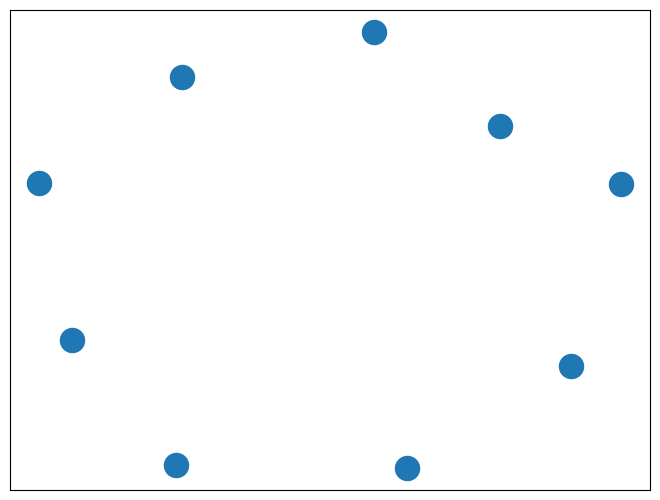

In [58]:
# Specify the edges you want here
# red_nodes = []
# black_nodes = []
node_colours = []
for i in range(Homo.y.size()[0]):
    if Homo.y[i] == 1:
        node_colours.append('red')
    else:
        node_colours.append('black')

edge_one_way = []
for i in range(Homo.edge_index[0].size()[0]):
    if Homo.edge_type[i] == 0:
        edge_one_way.append([Homo.edge_index[0][i].item(),Homo.edge_index[1][i].item()])

sub = Homo.subgraph(torch.tensor([0,1,2]))
# Need to create a layout when doing
# separate calls to draw nodes and edges
node_colours = []
for i in range(sub.y.size()[0]):
    if Homo.y[i] == 1:
        node_colours.append('red')
    else:
        node_colours.append('black')

edge_one_way = []
for i in range(sub.edge_index[0].size()[0]):
    if Homo.edge_type[i] == 0:
        edge_one_way.append([sub.edge_index[0][i].item(),sub.edge_index[1][i].item()])

print(sub)
print(node_colours)
nx.draw(sub)

In [64]:
Homo.edges()

AttributeError: 'GlobalStorage' object has no attribute 'edges'

In [ ]:
pos = nx.spring_layout(sub)
# #nx.draw(sub,pos=pos,color=node_colours)
nx.draw_networkx_nodes(sub, pos, node_color = node_colours)
nx.draw_networkx_labels(sub, pos)
nx.draw_networkx_edges(sub, pos, edgelist=edge_one_way, edge_color='b', arrows=True)
#nx.draw_networkx_edges(sub, pos, edgelist=black_edges, arrows=False)
plt.show()

In [ ]:
import torch
import torch_geometric
import torch_geometric.data as data
import torch_geometric.transforms as T

G = data.HeteroData()
G['user'].x = torch.randn(4,10)
G['merch'].x = torch.randn(2,10)
G['user','trans','merch'].edge_label = torch.tensor([0,1,0,1,0,0])
G['user','trans','merch'].edge_index = torch.tensor([[0,1,2,1,2,3],[0,0,0,1,1,1,]])
G['user','trans','merch'].edge_attr = torch.randn(6,1)
G['user','trans','merch'].edge_ts = torch.randn(6,1)
G['user','trans','merch'].edge_mask_index = torch.randn(6,1)